Подключаем drive

In [28]:
#from google.colab import drive
#drive.mount('/content/drive')

In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import pylab as plt
import missingno
from sklearn.preprocessing import LabelEncoder
bin_size = 10

Загрузка Titanic.csv


In [30]:
#df = pd.read_csv('/content/drive/MyDrive/Titanic.csv')
df = pd.read_csv('titanic.csv')

Смотрим на потерянные значения, чтобы позже их устранить

<Axes: >

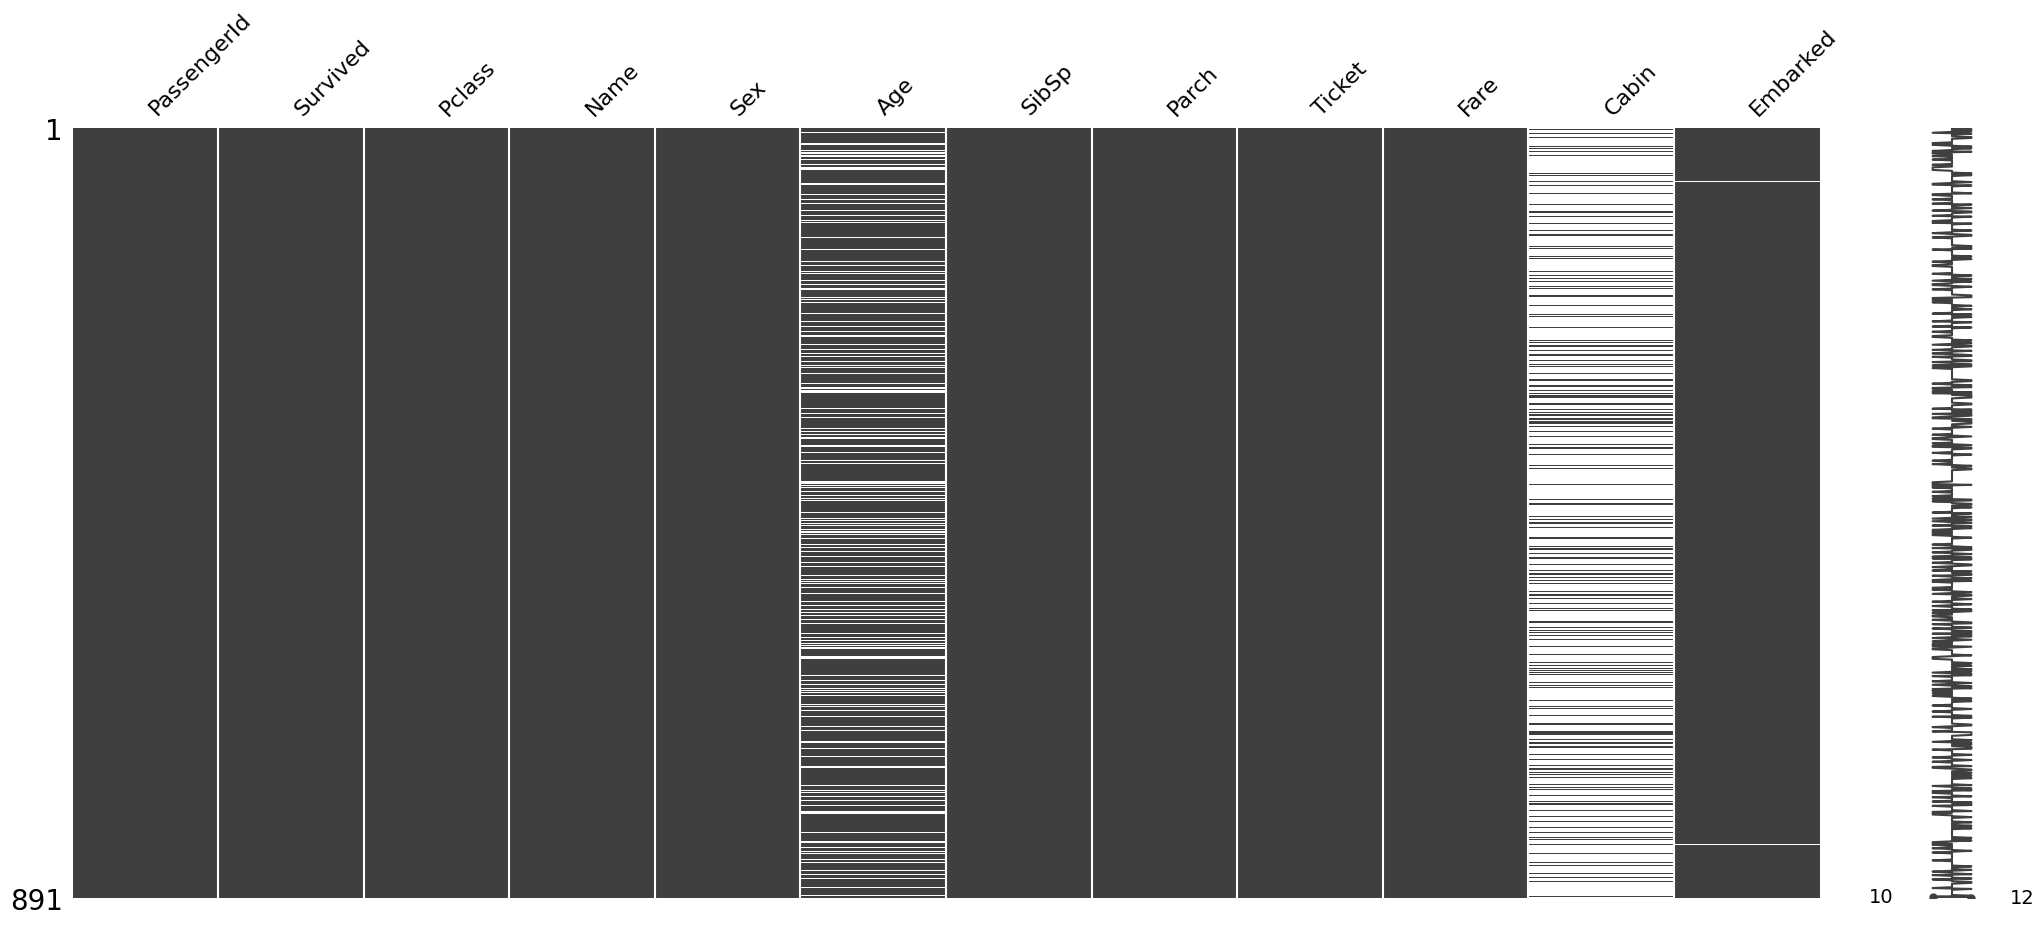

In [31]:
missingno.matrix(df)

Как видим, что нам нужно будет восстановить Age. Cabin можно отбросить, не думаю, что от этого зависит выживаемость, также как и стоимость билета, она зависит от класса пассажира

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Круговой график выживших и умерших людей.

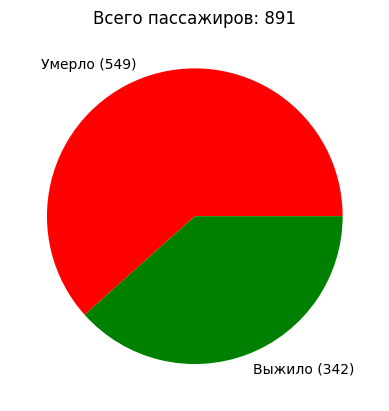

In [33]:
survival_counts = df['Survived'].value_counts()
total_passengers = survival_counts.sum()
plt.pie(survival_counts, labels=[f'Умерло ({survival_counts[0]})', f'Выжило ({survival_counts[1]})'], colors=['red', 'green'])
plt.title(f'Всего пассажиров: {total_passengers}')
plt.show()

Распределение на мужчина/женщина. *💭 Возможно среди мужчин/женщин выживших больше*

<Axes: title={'center': 'Пассажиры'}, xlabel='Sex'>

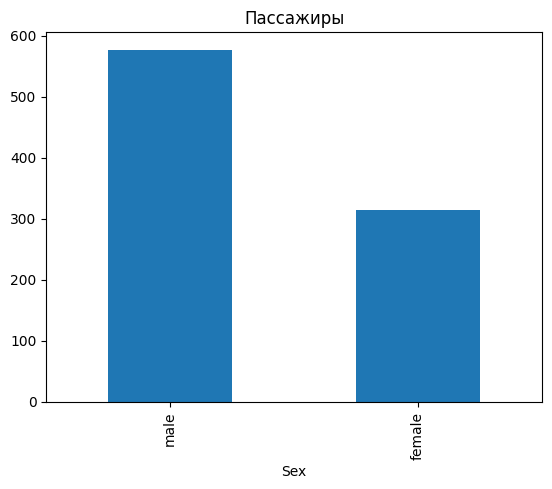

In [34]:
df['Sex'].value_counts().plot(kind='bar', title='Пассажиры')

Распределение по возрасту
*💭 Умерших среди детей меньше/больше*


<Axes: >

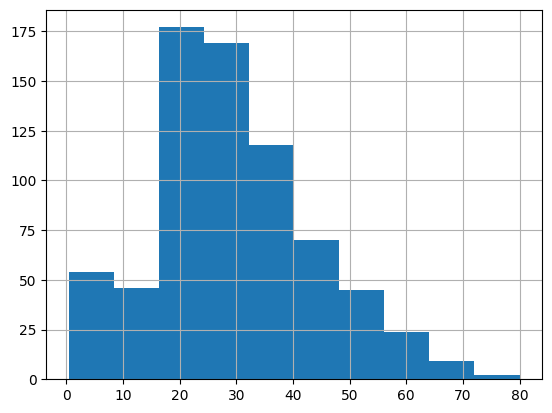

In [35]:
df['Age'].hist()

Распределение по классам *💭 Возможно, в первом/втором/третьем классе выживших намного больше*

<Axes: title={'center': 'Класс пассажира'}, xlabel='Pclass'>

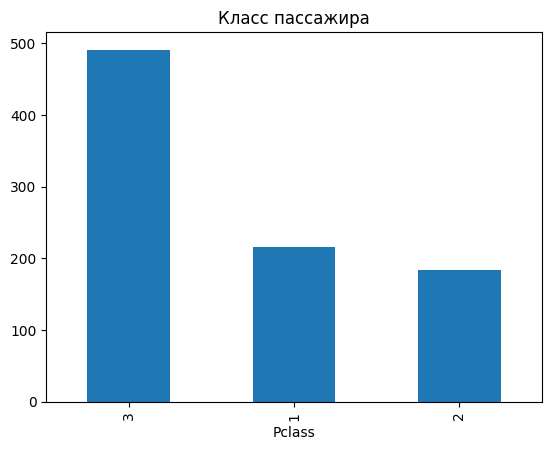

In [36]:
df['Pclass'].value_counts().plot(kind='bar', title='Класс пассажира')

**Гипотеза: выжило больше женщин/мужчин**

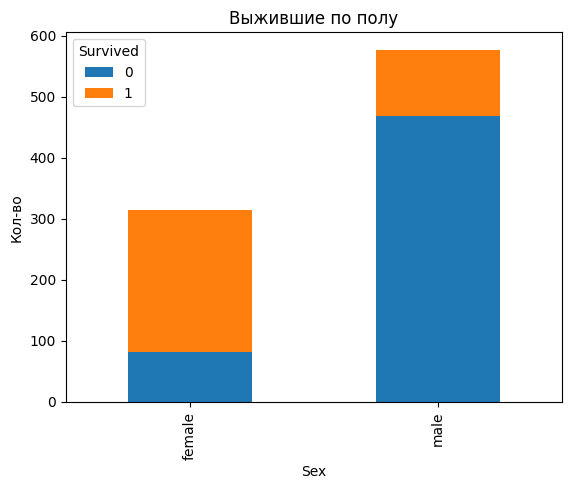

In [37]:
survival_by_sex = df.groupby('Sex')['Survived'].value_counts()
survival_by_sex.unstack().plot(kind='bar', stacked=True, title='Выжившие по полу')
plt.ylabel('Кол-во')
plt.show()

Как видим, выживших среди женщин значительно больше, чем мужчин. **Возможный вывод: Мужчины старались уберечь женщин он гибели.**

**Гипотеза: Среди детей выживших больше/меньше**

Заполняем пропущенные значения возраста средним

In [38]:
df['AgeFill'] = df['Age']
df['AgeFill'] = df['AgeFill'].fillna(df['AgeFill'].median())
missing_agefill_rows = df.loc[df['AgeFill'].isnull()]
df.head()
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,32.0


смотрим на долю выживших по категориям возраста

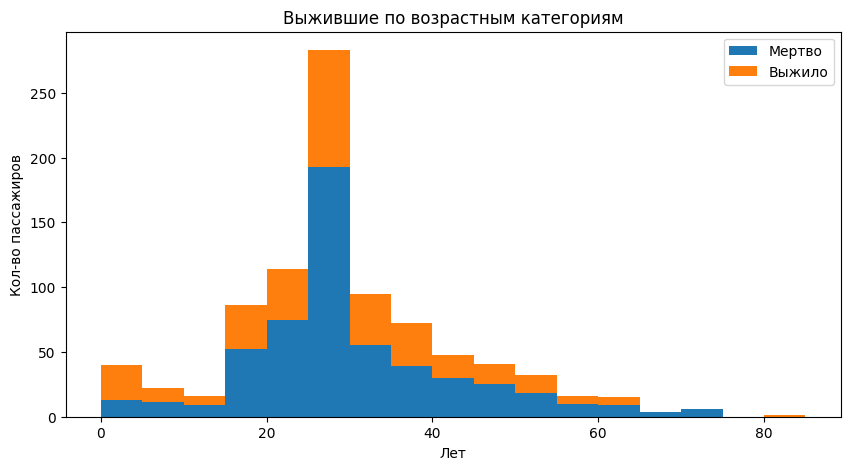

In [39]:
df1 = df[df['Survived'] == 0]['AgeFill']
df2 = df[df['Survived'] == 1]['AgeFill']
max_age = int(df['AgeFill'].max())
fig, axes = plt.subplots(figsize=(10, 5))
axes.hist([df1, df2], bins=np.arange(0, max_age + bin_size, 5), stacked=True)
axes.legend(('Мертво', 'Выжило'), loc='best')
axes.set_title('Выжившие по возрастным категориям')
axes.set_xlabel('Лет')
axes.set_ylabel('Кол-во пассажиров')
plt.show()

Вывод: детей на корабле было довольно таки мало, в сравнении со средним возрастом. Большая часть погибших пришлось на возрастную категорию 30 лет.
*💭Возможно, это были мужчины/женщины*


**Гипотеза: Среди первого/второго/третьего классов выживших больше, чем в остальных**

Посмотрим на график выживаемость среди пассажирских классов

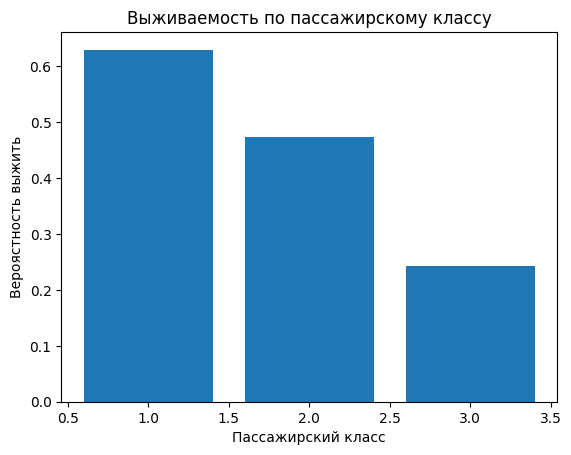

In [40]:
survival_prob = df.groupby('Pclass')['Survived'].mean()
plt.bar(survival_prob.index, survival_prob.values)
plt.xlabel('Пассажирский класс')
plt.ylabel('Вероястность выжить')
plt.title('Выживаемость по пассажирскому классу')
plt.show()

**Вывод:** Первый класс имеет вероятность выживания выше, чем остальные классы. Думаю, это из-за того, что ехала семья элиты, которых спасали намного чаще

Также можно проверить такие гипотезы:


1.   Выживаемость каких семей (коли ужчество родственников) была выше? Или человек был один?
2.   Как зависит выживаемость семей от пассажирского класса?
3.   
4.   Выживаемость по месту посадки?
5.   Выживаемость по стоимости билета?
и тд.

Признаки выживаемости: Семья, Возраст, Пассажирский класс, Порт посадки

**Преобразования**

Пол в числовые данные

In [41]:
le = LabelEncoder()
df['Sex_int_value'] = le.fit_transform(df['Sex'])
df['Sex_int_value'] = df['Sex_int_value'].astype('int64')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill,Sex_int_value
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,1


Трансофрмируем embarked столбец в числовой формат
Был ли человек с семьей или же он был один. Заполним дополнительный столбец

In [42]:
df['Embarked_value'] = le.fit_transform(df['Embarked'])
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 0, 'IsAlone'] = 1
df['IsAlone'] = df['IsAlone'].astype('int32')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill,Sex_int_value,Embarked_value,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,1,2,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,0,2,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0,0,2,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,1,0,0,1


In [43]:
df.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
AgeFill           float64
Sex_int_value       int64
Embarked_value      int32
FamilySize          int64
IsAlone             int32
dtype: object

Вырезаем из таблицы PassengerID(Не пригодится при обучении в принципе), Name (Имя не сыграет ролии в вероятности выжить), Sex(Потому что у нас есть числовая альтернатива), Ticket (Не нужен при обучении тк там только название тикета), Cabin(кабина, в которой расположился  заполнить ее более-менее правлоподобными значениями не представлялось возможным), Embarked(Есть числовая альтернатива), Age (Есть заполненная альтернатива), SibSp и Parch (есть единый столбец для этого).

In [44]:
df = df.drop(columns=['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age', 'SibSp', 'Parch'])
df

,Survived,Pclass,Fare,AgeFill,Sex_int_value,Embarked_value,FamilySize,IsAlone
0,0,3,7.2500,22.0,1,2,1,0
1,1,1,71.2833,38.0,0,0,1,0
2,1,3,7.9250,26.0,0,2,0,1
3,1,1,53.1000,35.0,0,2,1,0
4,0,3,8.0500,35.0,1,2,0,1
...,...,...,...,...,...,...,...,...
886,0,2,13.0000,27.0,1,2,0,1
887,1,1,30.0000,19.0,0,2,0,1
888,0,3,23.4500,28.0,0,2,3,0
889,1,1,30.0000,26.0,1,0,0,1


In [45]:
df.isnull().sum()

Survived          0
Pclass            0
Fare              0
AgeFill           0
Sex_int_value     0
Embarked_value    0
FamilySize        0
IsAlone           0
dtype: int64

X представляет признаки пассажиров (возраст, пол, тариф и другие).
y представляет целевую переменную "Survived", которая равна 1 если пассажир выжил, и 0 в противном случае.

In [46]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [47]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Modeling

Импортируем библиотеки нейронной сети

In [48]:
from tensorflow import keras
from keras import regularizers
from keras.optimizers import Nadam
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

Разделяем на тестовую и обучающую выборки и переводим в категориальный формат

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Обучаем нейронную сеть, заранее сделав стандартизацию через scaler

In [50]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Compile the model
model.compile(optimizer=Nadam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}, val_loss: {loss:.4f}')

Epoch 1/150


c:\Users\Александр\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 - 2s - 123ms/step - accuracy: 0.6134 - loss: 0.7219 - val_accuracy: 0.6503 - val_loss: 0.6414
Epoch 2/150
18/18 - 0s - 6ms/step - accuracy: 0.6169 - loss: 0.6841 - val_accuracy: 0.6853 - val_loss: 0.6299
Epoch 3/150
18/18 - 0s - 7ms/step - accuracy: 0.6292 - loss: 0.6810 - val_accuracy: 0.7413 - val_loss: 0.6166
Epoch 4/150
18/18 - 0s - 6ms/step - accuracy: 0.6344 - loss: 0.6587 - val_accuracy: 0.7902 - val_loss: 0.6020
Epoch 5/150
18/18 - 0s - 6ms/step - accuracy: 0.6309 - loss: 0.6507 - val_accuracy: 0.8392 - val_loss: 0.5862
Epoch 6/150
18/18 - 0s - 7ms/step - accuracy: 0.6415 - loss: 0.6481 - val_accuracy: 0.8322 - val_loss: 0.5743
Epoch 7/150
18/18 - 0s - 7ms/step - accuracy: 0.6608 - loss: 0.6313 - val_accuracy: 0.8322 - val_loss: 0.5639
Epoch 8/150
18/18 - 0s - 5ms/step - accuracy: 0.6573 - loss: 0.6332 - val_accuracy: 0.8392 - val_loss: 0.5544
Epoch 9/150
18/18 - 0s - 6ms/step - accuracy: 0.6924 - loss: 0.6237 - val_accuracy: 0.8322 - val_loss: 0.5449
Epoch 10/150
18/18 -

KeyboardInterrupt: 

Строим графики

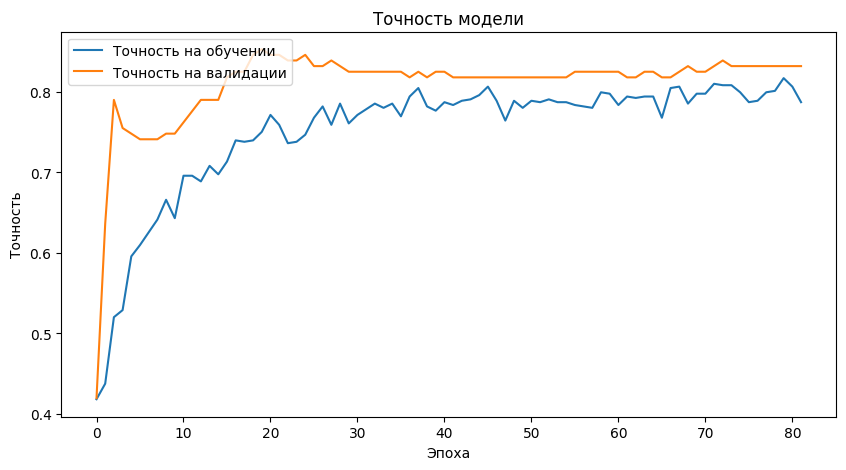

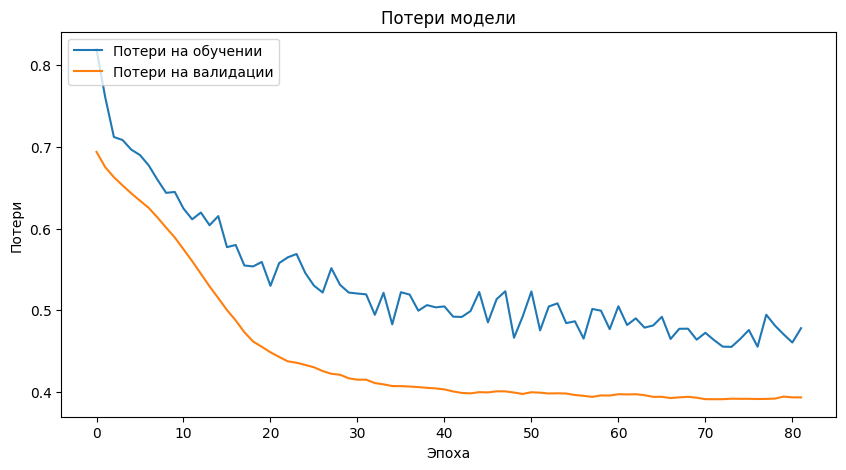

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label="Точность на обучении")
plt.plot(history.history['val_accuracy'], label="Точность на валидации")
plt.title("Точность модели")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend(loc="upper left")
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label="Потери на обучении")
plt.plot(history.history['val_loss'], label="Потери на валидации")
plt.title("Потери модели")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend(loc='upper left')
plt.show()

Новая модель (кросс-валидация)

In [25]:
df = pd.read_csv('titanic.csv')
le = LabelEncoder()

df['AgeFill'] = df['Age']
df['AgeFill'] = df['AgeFill'].fillna(df['AgeFill'].median())
df['Sex_int_value'] = le.fit_transform(df['Sex'])
df['Sex_int_value'] = df['Sex_int_value'].astype('int64')
df['Embarked_value'] = le.fit_transform(df['Embarked'])
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 0, 'IsAlone'] = 1
df['IsAlone'] = df['IsAlone'].astype('int32')
df = df.drop(columns=['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age', 'SibSp', 'Parch'])
df

,Survived,Pclass,Fare,AgeFill,Sex_int_value,Embarked_value,FamilySize,IsAlone
0,0,3,7.2500,22.0,1,2,1,0
1,1,1,71.2833,38.0,0,0,1,0
2,1,3,7.9250,26.0,0,2,0,1
3,1,1,53.1000,35.0,0,2,1,0
4,0,3,8.0500,35.0,1,2,0,1
...,...,...,...,...,...,...,...,...
886,0,2,13.0000,27.0,1,2,0,1
887,1,1,30.0000,19.0,0,2,0,1
888,0,3,23.4500,28.0,0,2,3,0
889,1,1,30.0000,26.0,1,0,0,1


In [26]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [27]:
from keras.optimizers import Nadam
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Standardize the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Nadam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
model = KerasClassifier(model, epochs=80, batch_size=16, verbose=0)

# Сделаем стратифицированную кросс-валидацию с 5 фолдами, перед разбиением на фолды перемешиваем данные(shuffle=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

for train_index, test_index in skf.split(X, y):
    #разбиваем данные по выборкам перед каждым фолдом
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #обуч модель
    model.fit(X_train, y_train)

    # Прогноз на тестовом наборе с преобразованием в бин.классы 0-1
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    print(f"Отчет о классификации для фолда {fold}:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print(f"Матрица ошибок для фолда {fold}:\n", cm)

    tn, fp, fn, tp = cm.ravel() #извлекаем значения из матрицы ошибок
    print(f"Расшифровка для фолда {fold}:")
    print(f"True Negative: {tn}")
    print(f"False Positive: {fp}")
    print(f"False Negative: {fn}")
    print(f"True Positive: {tp}\n")

    fold += 1 #переходим к след.фолду


c:\Users\Александр\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Отчет о классификации для фолда 1:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

Матрица ошибок для фолда 1:
 [[101   9]
 [ 22  47]]
Расшифровка для фолда 1:
True Negative: 101
False Positive: 9
False Negative: 22
True Positive: 47

Отчет о классификации для фолда 2:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.69      0.73        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178

Матрица ошибок для фолда 2:
 [[97 13]
 [21 47]]
Расшифровка для фолда 2:
True Negative: 97
False Positive: 13
False Negati

Исчисление в "Человек"
True Negative (TN): Модель предсказала, что человек не погибнет, и это верно
False Positive (FP): Модель предсказала, что человек погибнет, но он не погиб
False Negative (FN): Модель предсказала, что человек не погибнет, но он погиб
True Positive (TP): Модель предсказала, что человек погибнет, и это верно

Фолд 1:
TN: 101
FP: 9
FN: 22
TP: 47

Фолд 2:
TN: 97
FP: 13
FN: 21
TP: 47

Фолд 3:
TN: 102
FP: 8
FN: 26
TP: 42 

Фолд 4:
TN: 101
FP: 9
FN: 21 
TP: 47 

Фолд 5:
TN: 105 
FP: 4 
FN: 25 
TP: 44 

Выводы:
На основании пяти фолдов видно, что модель стабильно показывает высокие значения точности и полноты для класса «не погиб» (True Negative). Однако в случае класса «погиб» (True Positive) точность и полнота варьируются.

В большинстве случаев модель достаточно хорошо предсказывает выживание. 
Ошибочно предсказывая гибель (FP) реже, чем ошибочно предсказывая выживание тех, кто погиб (FN). 
Это означает, что модель склонна чаще ошибаться в сторону предсказания выживания, что может быть критичным для задач, связанных с прогнозированием гибели.

Модель показывает приемлемую сбалансированную работу с средним значением точности около 83% и точными предсказаниями в случае гибели и выживания. 
Тем не менее, можно сосредоточиться на снижении ошибок False Negative, чтобы улучшить точность предсказаний